### Breast Cancer DATASET 

I am using UCI ML Breast Cancer Wisconsin (Diagnostic) dataset from UCI machine learning repository. It will be loaded from sklearn.datasets so I havent attached the file with the submission. I'll try to  predict whether a tumor is malignant or benign using decision trees classifiers. 

Breast cancer is the most prevalent cancer in women in cities, and the second most common cancer in women in rural areas. We identify most breast cancers at an advanced stage is because of a lack of knowledge of the disease and the lack of a breast cancer screening program.With this case study, I hope to show the possibilities of a Decision tree for healthcare analysis-based machine learning algorithms in the early detection of breast cancer through test results and features. 

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier

cancer_data = load_breast_cancer()

In [6]:
type(cancer_data)

sklearn.utils.Bunch

## EDA : Exploratory Data Analysis

In [7]:
print("Feature Names: ",cancer_data.feature_names)

Feature Names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print("Feature Data:")
print(cancer_data.data)

Feature Data:
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [9]:
print("Label Names: ", cancer_data.target_names)

Label Names:  ['malignant' 'benign']


In [10]:
print("Label Data:")
cancer_data.target

Label Data:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
cancer_df = pd.DataFrame(data = cancer_data['data'], columns = cancer_data['feature_names'])
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [12]:
import sweetviz as sv

In [13]:
cancer_report = sv.analyze(cancer_df)

                                             |      | [  0%]   00:00 -> (? left)

In [14]:
cancer_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Divide the data into train (80%) and test (20%)

In [15]:
from sklearn.model_selection import train_test_split
X = cancer_df.copy()
y = cancer_data.target

X_train , X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 0)

print(X_train.shape);
print(y_train.shape);
print("\r\n");
print(X_test.shape);
print(y_test.shape);

(455, 30)
(455,)


(114, 30)
(114,)


In [16]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=4)

# Fit dt to the training set
dt = dt.fit(X_train, y_train)

In [17]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [18]:
## working to identifiy the feature most useful in identifying breast cancer. 

feature_names = X.columns
feature_importance = pd.DataFrame(dt.feature_importances_,index=feature_names)
feature_importance

,0
mean radius,0.000000
mean texture,0.000000
mean perimeter,0.024081
mean area,0.000000
mean smoothness,0.034808
mean compactness,0.000000
mean concavity,0.000000
mean concave points,0.000000
mean symmetry,0.017598
mean fractal dimension,0.000000


<AxesSubplot:>

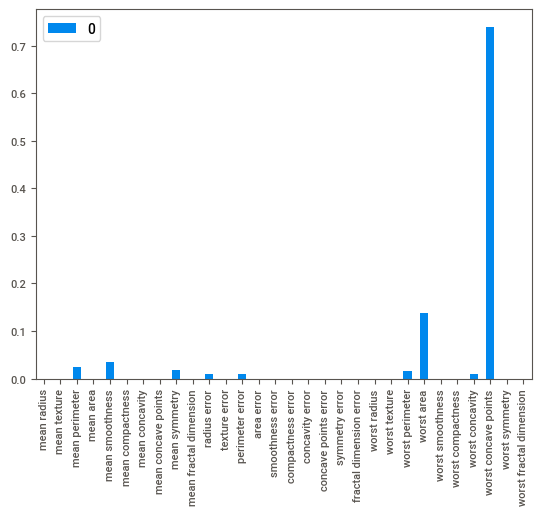

In [19]:
feature_importance.plot(kind="bar")

We find thart WORST CONCAVE POINTS are the most important feature in the diagonosis of Breast cancer. 



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay

In [24]:
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## ANN MODEL 


In [35]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


ann_model = Sequential()
ann_model.add(Dense(30, kernel_initializer='uniform', activation='relu', input_dim = 30))
ann_model.add(Dense(15, kernel_initializer='uniform', activation='relu'))
ann_model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid')) #classify

In [36]:
#Compile the model

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# train the model
ann_model.fit(X_train, y_train, batch_size=100, epochs=150, validation_split=0.2)

Epoch 1/150
4/4 [==============================] - 1s 60ms/step - loss: 0.7095 - accuracy: 0.6456 - val_loss: 0.7009 - val_accuracy: 0.6044
Epoch 2/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6939 - accuracy: 0.6456 - val_loss: 0.6932 - val_accuracy: 0.6044
Epoch 3/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6918 - accuracy: 0.6456 - val_loss: 0.6919 - val_accuracy: 0.6044
Epoch 4/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6913 - accuracy: 0.6456 - val_loss: 0.6915 - val_accuracy: 0.6044
Epoch 5/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6907 - accuracy: 0.6456 - val_loss: 0.6911 - val_accuracy: 0.6044
Epoch 6/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6901 - accuracy: 0.6456 - val_loss: 0.6907 - val_accuracy: 0.6044
Epoch 7/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6896 - accuracy: 0.6456 - val_loss: 0.6903 - val_accuracy: 0.6044
Epoch 8/150
4/4 [====

4/4 [==============================] - 0s 10ms/step - loss: 0.6684 - accuracy: 0.6456 - val_loss: 0.6768 - val_accuracy: 0.6044
Epoch 60/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6681 - accuracy: 0.6456 - val_loss: 0.6767 - val_accuracy: 0.6044
Epoch 61/150
4/4 [==============================] - 0s 11ms/step - loss: 0.6678 - accuracy: 0.6456 - val_loss: 0.6765 - val_accuracy: 0.6044
Epoch 62/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6676 - accuracy: 0.6456 - val_loss: 0.6764 - val_accuracy: 0.6044
Epoch 63/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6673 - accuracy: 0.6456 - val_loss: 0.6762 - val_accuracy: 0.6044
Epoch 64/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6670 - accuracy: 0.6456 - val_loss: 0.6761 - val_accuracy: 0.6044
Epoch 65/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6668 - accuracy: 0.6456 - val_loss: 0.6759 - val_accuracy: 0.6044
Epoch 66/150
4/4 [========

4/4 [==============================] - 0s 10ms/step - loss: 0.6569 - accuracy: 0.6456 - val_loss: 0.6717 - val_accuracy: 0.6044
Epoch 118/150
4/4 [==============================] - 0s 9ms/step - loss: 0.6568 - accuracy: 0.6456 - val_loss: 0.6717 - val_accuracy: 0.6044
Epoch 119/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6567 - accuracy: 0.6456 - val_loss: 0.6716 - val_accuracy: 0.6044
Epoch 120/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6566 - accuracy: 0.6456 - val_loss: 0.6716 - val_accuracy: 0.6044
Epoch 121/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6565 - accuracy: 0.6456 - val_loss: 0.6716 - val_accuracy: 0.6044
Epoch 122/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6564 - accuracy: 0.6456 - val_loss: 0.6715 - val_accuracy: 0.6044
Epoch 123/150
4/4 [==============================] - 0s 10ms/step - loss: 0.6562 - accuracy: 0.6456 - val_loss: 0.6715 - val_accuracy: 0.6044
Epoch 124/150
4/4 [==

In [38]:
# Testing ANN Model
#seperating as class 0 and 1 as per sigmoid function
y_pred = ann_model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 1ms/step


In [39]:
loss, accuracy = ann_model.evaluate(X_test, y_test)
print(f'Loss in the ANN Model design : {loss:.4f}')
print(f'Accuracy in the ANN Model design : {accuracy*100:.4f}')

4/4 [==============================] - 0s 2ms/step - loss: 0.6783 - accuracy: 0.5877
Loss in the ANN Model design : 0.6783
Accuracy in the ANN Model design : 58.7719
